In [1]:
%matplotlib inline

#%matplotlib 
#import matplotlib.pyplot as plt
#plt.ion()

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time

In [4]:
cwd = os.getcwd()
NOTEBOOK_DIR = os.path.dirname(cwd+'/')
ROOT = os.path.dirname(NOTEBOOK_DIR)

import sys
sys.path.append(ROOT)

In [30]:
from utils.plot import *
from utils.tools import *
from utils.nn import TARGET_FUNCS_DICT, LOSS_DICT
from networks import two_layer_net

In [6]:
FIGURES_DIR = os.path.join(ROOT, 'figures/2-layer/neurons_dynamic')

## Constants

In [7]:
n_samples = 500
input_dim = 3
width = 1024
bias = True
n_steps = 1000
base_lr = 0.001
batch_size = None
tgt_func_name = "target_func"

SEED = 42
pause = 1e-6

In [8]:
set_random_seeds(SEED)

## Set up data, model, loss and optimizer

In [9]:
# data
X = torch.randn(size=(n_samples, input_dim), requires_grad=False)
target_func = TARGET_FUNCS_DICT[tgt_func_name]
y = target_func(X).reshape(len(X), 1)

# network
network = two_layer_net.TwoLayerNet(input_dim=input_dim, width=width, bias=bias)
network.train()

# loss & optimizer
loss = LOSS_DICT['mse'](reduction='mean')
optimizer = torch.optim.SGD(network.parameters(), lr=width * base_lr)

## Plot initial neurons

In [10]:
signs = network.output_layer.weight.data.detach().numpy()[0]
init_neurons = network.input_layer.weight.data.detach().clone().numpy()

## Train for a few steps

In [11]:
if batch_size is None:
    batch_size = n_samples

In [12]:
# figsize = (8, 8)
    # fig = plt.figure(figsize=figsize)
    # 
    # cmpt_steps = 0
    # batch_index = 0
    # while cmpt_steps < 40:
    #     with torch.no_grad():
    #         plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
    #         fig_path = os.path.join(FIGURES_DIR, 'step_{}.png'.format(cmpt_steps))
    #         plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
    #         fig.canvas.draw()
    #         # plt.pause(pause)
    #         fig.canvas.flush_events()
    # 
    #     if batch_index >= n_samples:
    #         batch_index = 0
    #     # batch inputs and targets
    #     batch_x = X[batch_index: batch_index + batch_size, :]
    #     batch_y = y[batch_index: batch_index + batch_size]
    #     batch_index += batch_index + batch_size
    # 
    #     # forward
    #     y_hat = network.forward(batch_x)
    #     loss_ = loss(y_hat, batch_y)
    # 
    #     # backward and gradient step
    #     print(loss_.detach().item())
    #     loss_.backward()
    #     optimizer.step()
    # 
    #     cmpt_steps += 1
    # 
    # with torch.no_grad():
    #     plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
    #     fig_path = os.path.join(FIGURES_DIR, 'step_{}.png'.format(cmpt_steps))
    #     plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
    #     fig.canvas.draw()
    #     # plt.pause(pause)
    #     fig.canvas.flush_events()

## Plot loss

In [13]:
losses = []
neurons = [network.input_layer.weight.data.detach().clone().numpy()]
# fig = plt.figure(figsize=(8,8))

cmpt_steps = 0
batch_index = 0
while cmpt_steps < 500:
    #plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
    #fig_path = os.path.join(FIGURES_DIR, 'bias', 'step_{}.png'.format(cmpt_steps))
    #plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
    
    if batch_index >= n_samples:
        batch_index = 0
    # batch inputs and targets
    batch_x = X[batch_index: batch_index + batch_size, :]
    batch_y = y[batch_index: batch_index + batch_size]
    batch_index += batch_index + batch_size

    # forward
    y_hat = network.forward(batch_x)
    loss_ = loss(y_hat, batch_y)

    # backward and gradient step
    # print(loss_.detach().item())
    losses.append(loss_.detach().item())
    loss_.backward()
    optimizer.step()
    
    neurons.append(network.input_layer.weight.data.detach().clone().numpy())

    cmpt_steps += 1
    
#plot_neurons_3d(fig, neurons=network.input_layer.weight.data.detach().numpy(), signs=signs)
#fig_path = os.path.join(FIGURES_DIR, 'bias', 'step_{}.png'.format(cmpt_steps))
#plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)

0
1
2
3
4
5
6
7


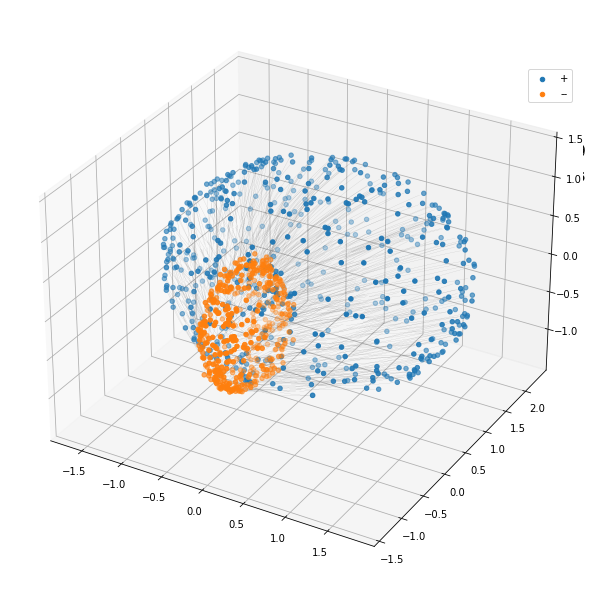

In [31]:
fig = plt.figure(figsize=(8,8))
plot_neurons_3d(fig, neurons=neurons[0], signs=signs)
fig_path = os.path.join(FIGURES_DIR, 'bias', 'trajectory', 'step_{}.png'.format(0))
plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)
for i in range((len(neurons) // 5)):
    print(i)
    plot_neurons_trajectory_3d(fig, neurons=neurons[:5 * (i+1)], signs=signs)
    fig_path = os.path.join(FIGURES_DIR, 'bias', 'trajectory', 'step_{}.png'.format(5 * (i+1)))
    plt.savefig(fig_path, bbox_inches='tight', pad_inches=0)

ERROR! Session/line number was not unique in database. History logging moved to new session 1632


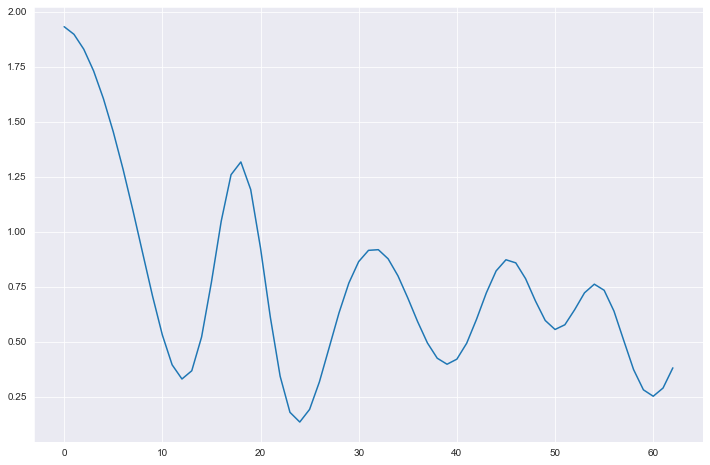

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(np.arange(len(losses)), losses)